타이타닉 튜토리얼 공부하기-2

참고 : https://kaggle-kr.tistory.com/17?category=868316

위 사이트를 참고하여 공부하였습니다.

In [1]:
# 라이브러리 설치하기
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # 그래프가 더욱 시각적으로 매력적이고 가독성이 좋아짐
sns.set(font_scale = 2.5) # 기본 크기보다 2.5배 크게 표시

import missingno as msno 
import warnings 
warnings.filterwarnings('ignore') 
%matplotlib inline

C:\Users\yousb\AppData\Local\Temp\ipykernel_16376\2820455069.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')  # 그래프가 더욱 시각적으로 매력적이고 가독성이 좋아짐


In [2]:
# 데이터 불러오기
df_train = pd.read_csv(r"C:\Users\yousb\Desktop\bincoding\Kaggle\train.csv", encoding="cp949")
df_test = pd.read_csv(r"C:\Users\yousb\Desktop\bincoding\Kaggle\test.csv", encoding= "cp949")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Exploratory Data Analysis = EDA

많은 데이터 안에 숨겨진 사실을 찾기 위해서는 적절한 시각화가 필요합니다.

시각화 라이브러리는 matplotlib, seaborn, plotly 등이 있습니다. 


## 2.1 Pclass 

- Pclass는 ordinal, 서수형 데이터입니다. 카테고리이면서, 순서가 있는 데이터 타입입니다.
- Pclass에 따른 생존률의 차이를 살펴봅니다. pandas dataframe에서 groupby를 사용합니다. 또한 pivot메서드도 있습니다.
- 다음과 같이 count()를 하면, 각 class에 몇명이 있는지 확인할 수 있습니다. sum()을 하면 216명 중 생존한(survived = 1)사람의 총합을 주게 됩니다.

In [3]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).count()   

,Survived
Pclass,
1,216
2,184
3,491


In [4]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

,Survived
Pclass,
1,136
2,87
3,119


pandas의 crosstab을 사용하면 위에 과정을 좀 더 수월하게 볼 수 있습니다.

In [5]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- margins = True : 교차표에서 행과 열을 추가하는 매개변수
- background_gradient : 색상 그라데이션 적용하여 표를 시각적으로 표현
- cmap = 'summer_r' : 컬러맵을 사용하여 배경그라데이션 적용

grouped 객체에 mean()을 하면 각 클래스별 생존률을 얻을 수 있습니다. class 1이면 다음과 같습니다.

<Axes: xlabel='Pclass'>

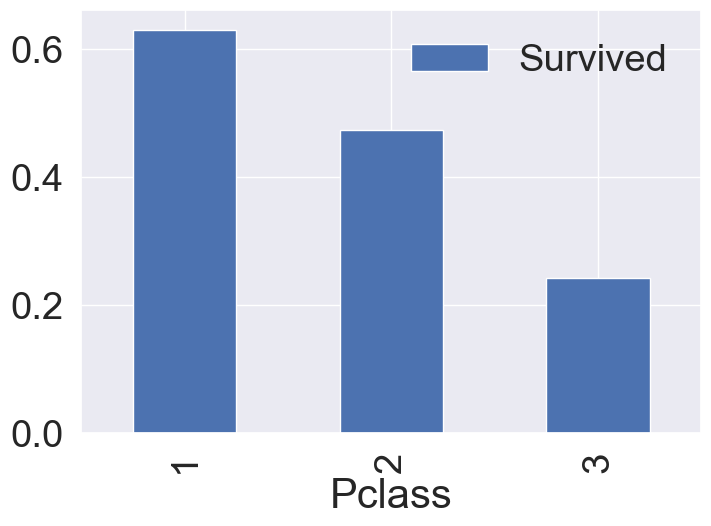

In [6]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

- 위 결과를 보면, Pclass가 좋을 수록(1st) 생존률이 높은 것을 확인할 수 있습니다.
- 좀 더 보기 쉽게 그래프를 그려보겠습니다. seaborn의 countplot를 이용하면 특정  label에 따른 개수를 확인해볼 수 있습니다.

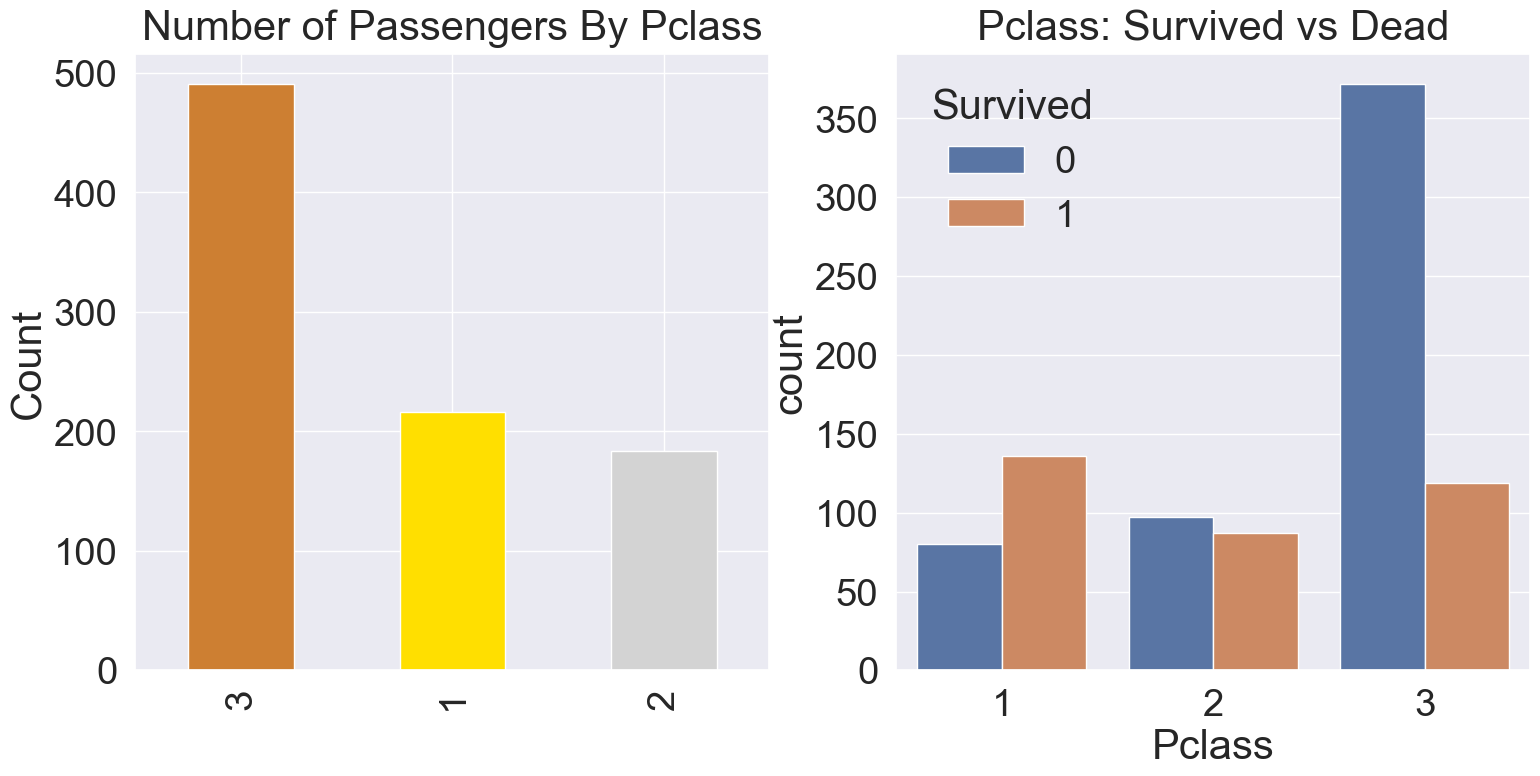

In [7]:
y_position = 1.01   # 그래프와 제목 간격
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number of Passengers By Pclass', y = y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y = y_position)
plt.show()

- 클래스가 높을 수록 생존 확률이 높은 것을 볼 수 있습니다. Pclass 1,2,3 순서대로 63%, 48%, 25% 입니다.
- 생존에 Pclass가 큰 영향을 미친다고 생각할 수 있습니다.
- 나중에 모델을 세울 때 이 feature를 사용하는 것이 좋을 것으로 판단합니다.

## 2.2 Sex

- 이번에는 성별로 생존률이 어떻게 달라지는 지 확인합니다.
- 마찬가지로 pandas groupby 와 seaborn countplot를 사용하여 시각화합니다.

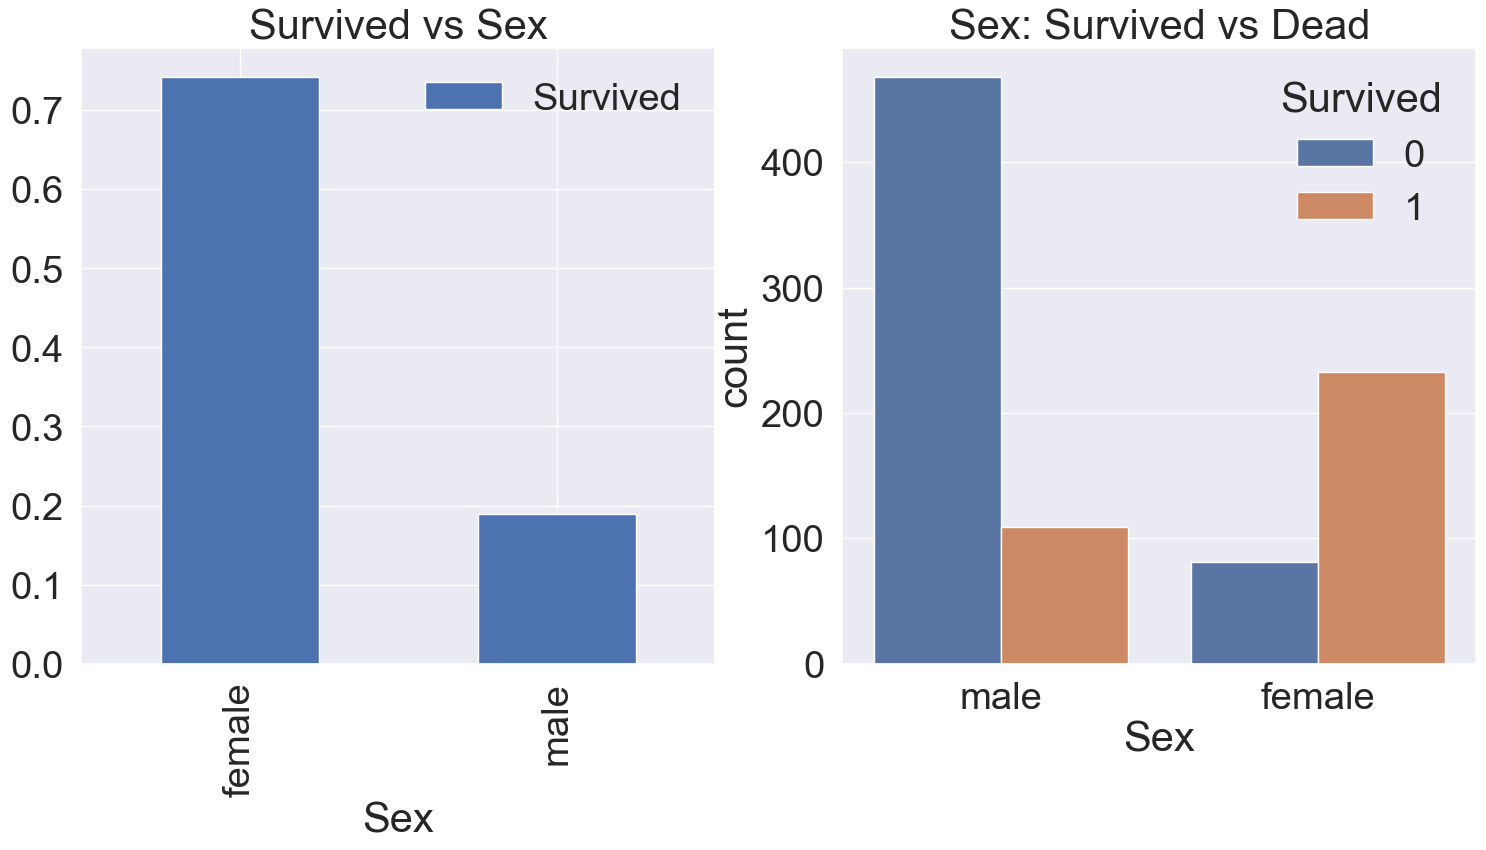

In [8]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

- 여자가 생존할 확률이 더 높습니다.

In [9]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- Pclass와 마찬가지로, Sex도 예측 모델에 쓰일 중요한 feature임을 알 수 있었습니다.

# 2.3 Both Sex and Pclass
- 다음은 Sex, Pcalss 두가지에 대해 생존이 어떻게 달라지는지 확인해봅니다.
- seaborn의 factorplot을 이용하면 3개의 차원으로 이루어진 그래프를 쉽게 그릴 수 있습니다.

- seaborn 예전 버전에서 factorplot사용 최신 버전은 catplot으로 변경 

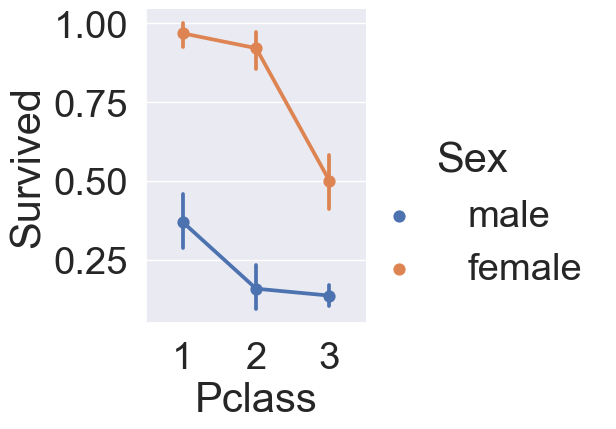

In [19]:
sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, kind = 'point')
plt.show()

# hue = 'Sex' : sex의 열 값으로 색상구분
# kind = 'point' : 각 카테고리 별 값의 추정치를 점으로 표시

- 모든 클래스에서 female이 male보다 살 확률이 높다는 것을 알 수 있습니다.
- 남자, 여자 상관없이 클래스가 높을 수록 살 확률이 높습니다.
- 위 그래프를 hue 대신  column으로 하면 다음과 같습니다.

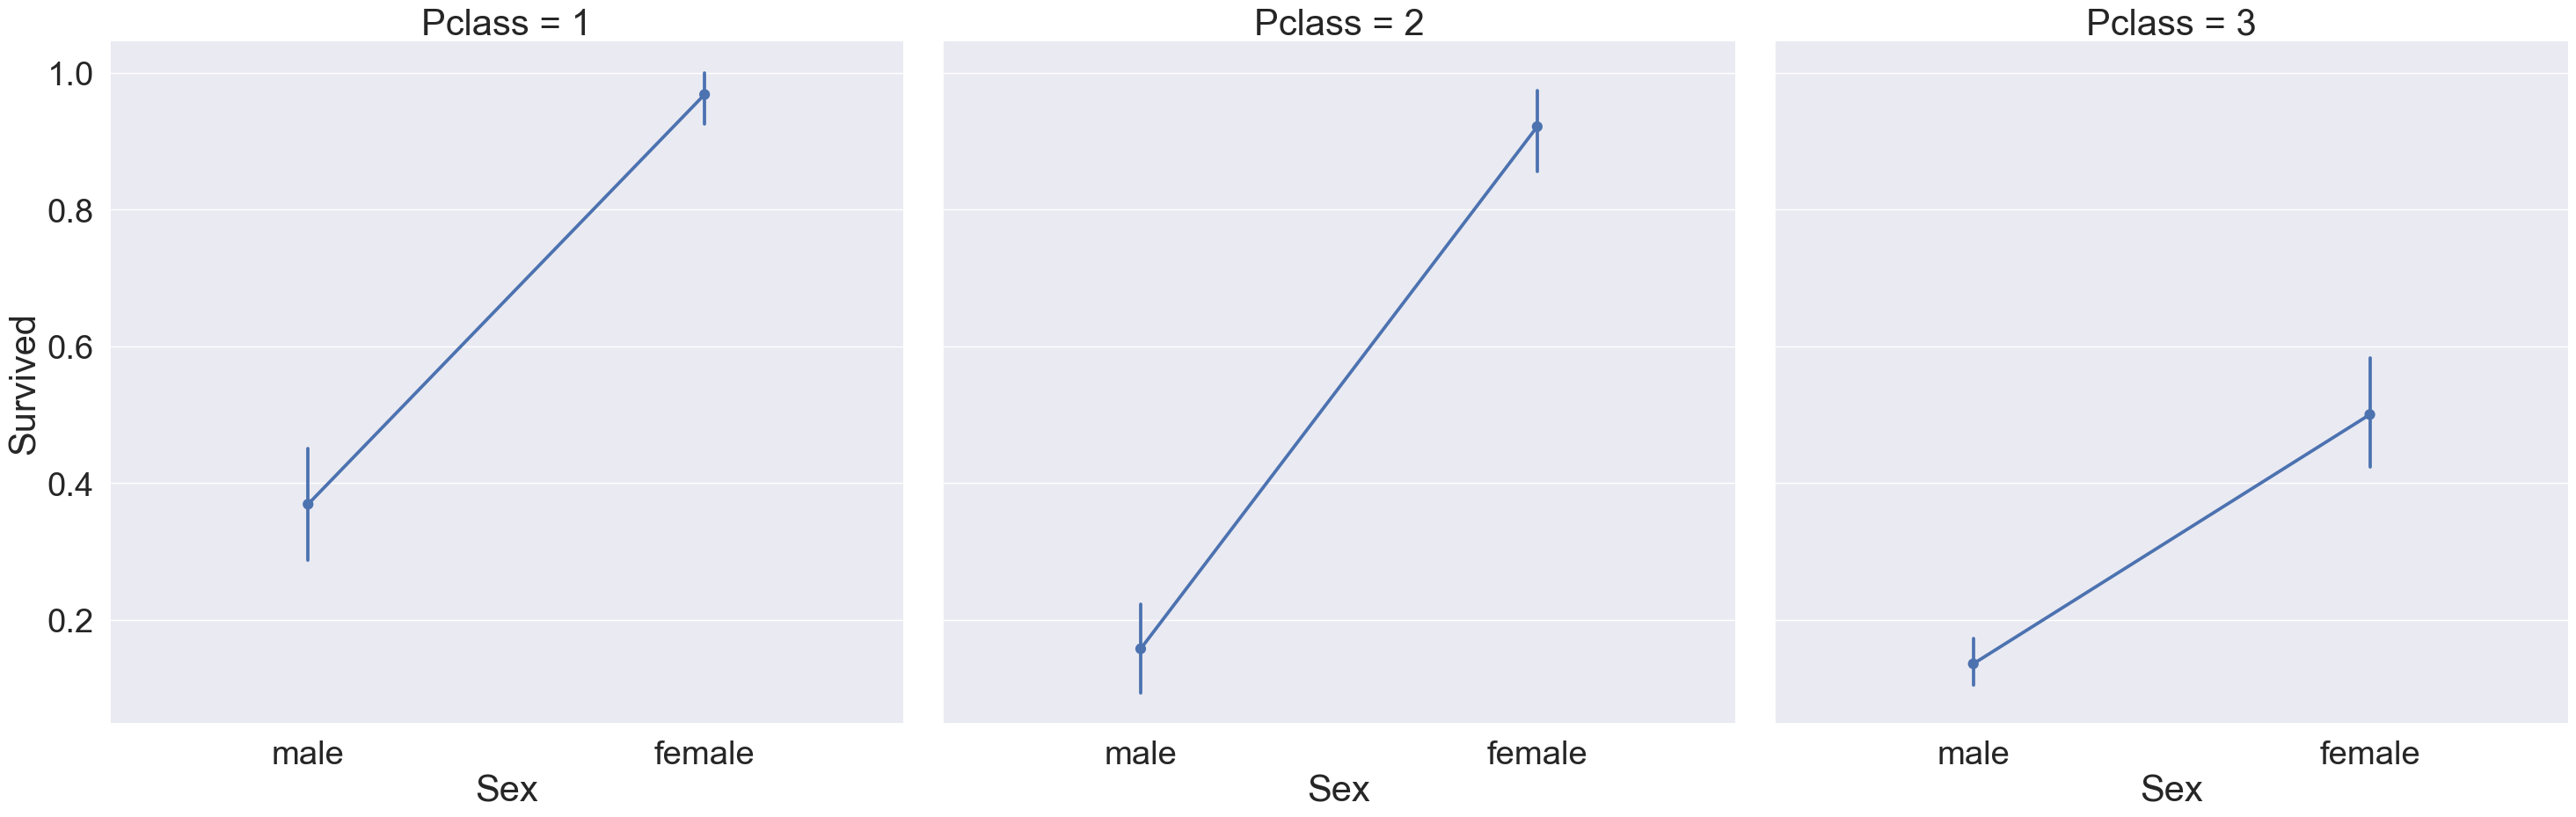

In [45]:
sns.catplot(x ='Sex', y = 'Survived', col = 'Pclass', data = df_train, kind = 'point', height = 10, aspect = 1)
plt.show()

# 2.4 Age
- 다음은 Age feature를 살펴봅니다.

In [11]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


- 생존에 따른 Age histogram을 그려보겠습니다.

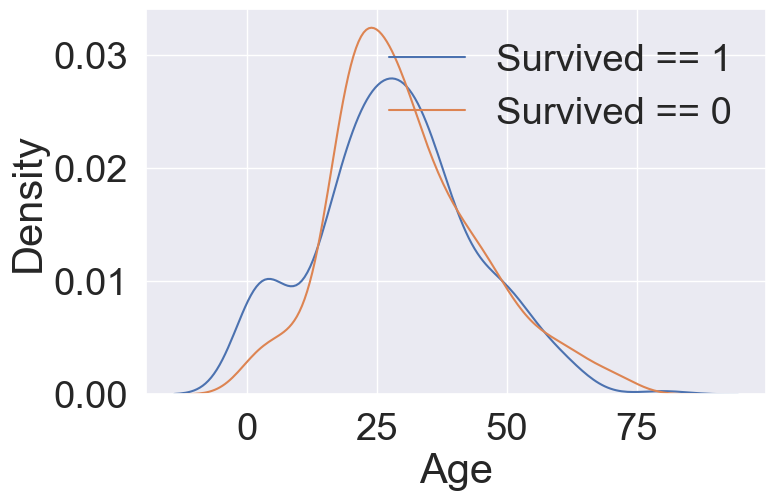

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax) # kdeplot: histogram과 유사하지만 더 부드러운 곡선 형태로 데이터 시각화
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

- 나이가 어린 생존자가 더 많습니다.

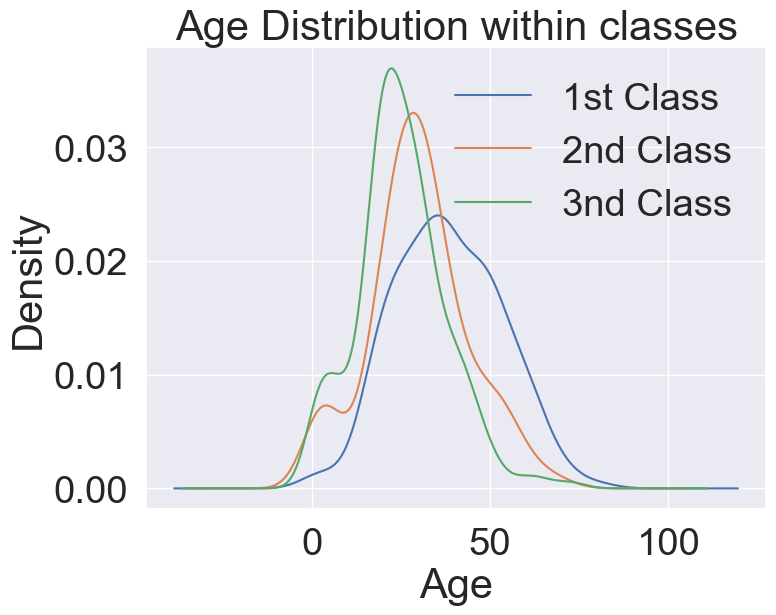

In [56]:
# Age distribution withing classes 클래스별 연령 분포
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind = 'kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind = 'kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3nd Class'])
plt.show()

- Class가 높을 수록 나이가 많은 사람의 비중이 커집니다.

-  다음은 나이대가 변하면서 생존률이 어떻게 되는지 보려고 합니다.
- 나이 범위를 점점 넓혀가면서 생존률이 어떻게 되는지 봅니다.

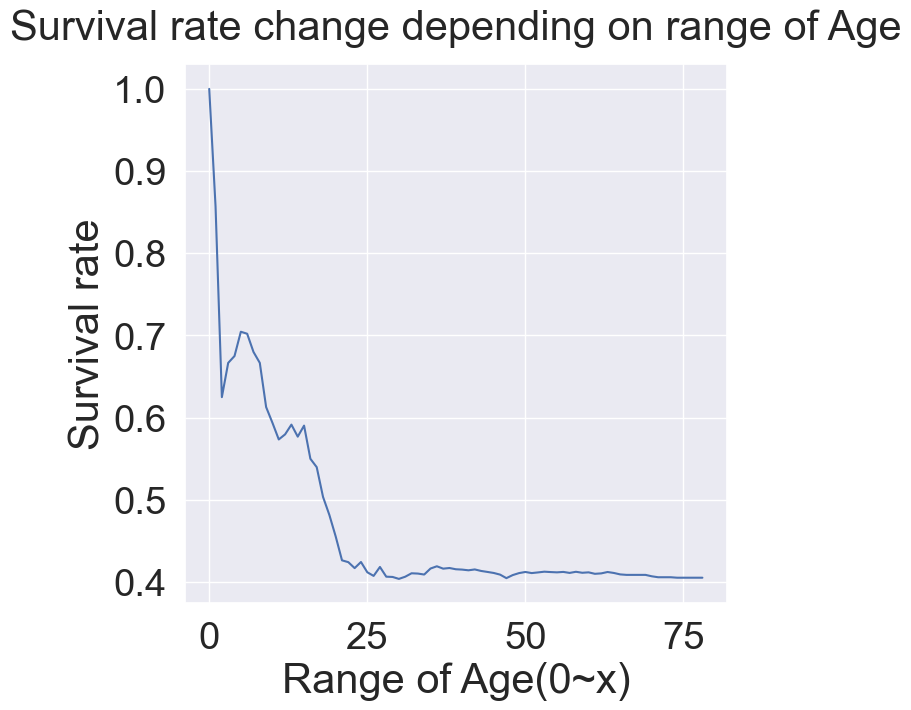

In [65]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    # 현재 나이(i)보다 작은 승객들의 생존 여부를 확인하고, 생존한 승객의 수를 전체 승객 수로 나누어 누적 생존율을 계산하여 리스트에 추가
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y = 1.03)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

- 결과로 알 수 있듯이 어릴 수록 생존률이 더 높은 것을 확인할 수 있습니다.
- Age가 중요한 feature로 쓰일 수 있음을 확인했습니다.

# 2.5 Pclass, Sex, Age
- 지금까지 본 Sex, Pclass, Age, Survived 모두에 대해 보려고 합니다. 이를 쉽게 그려주는 것이 seaborn의 violineplot입니다.
- x축은 우리가 나누어 보고싶어하는 case(여기서는 Pcalss, Sex)를 나타내고, y축은 distribution(Age)입니다.

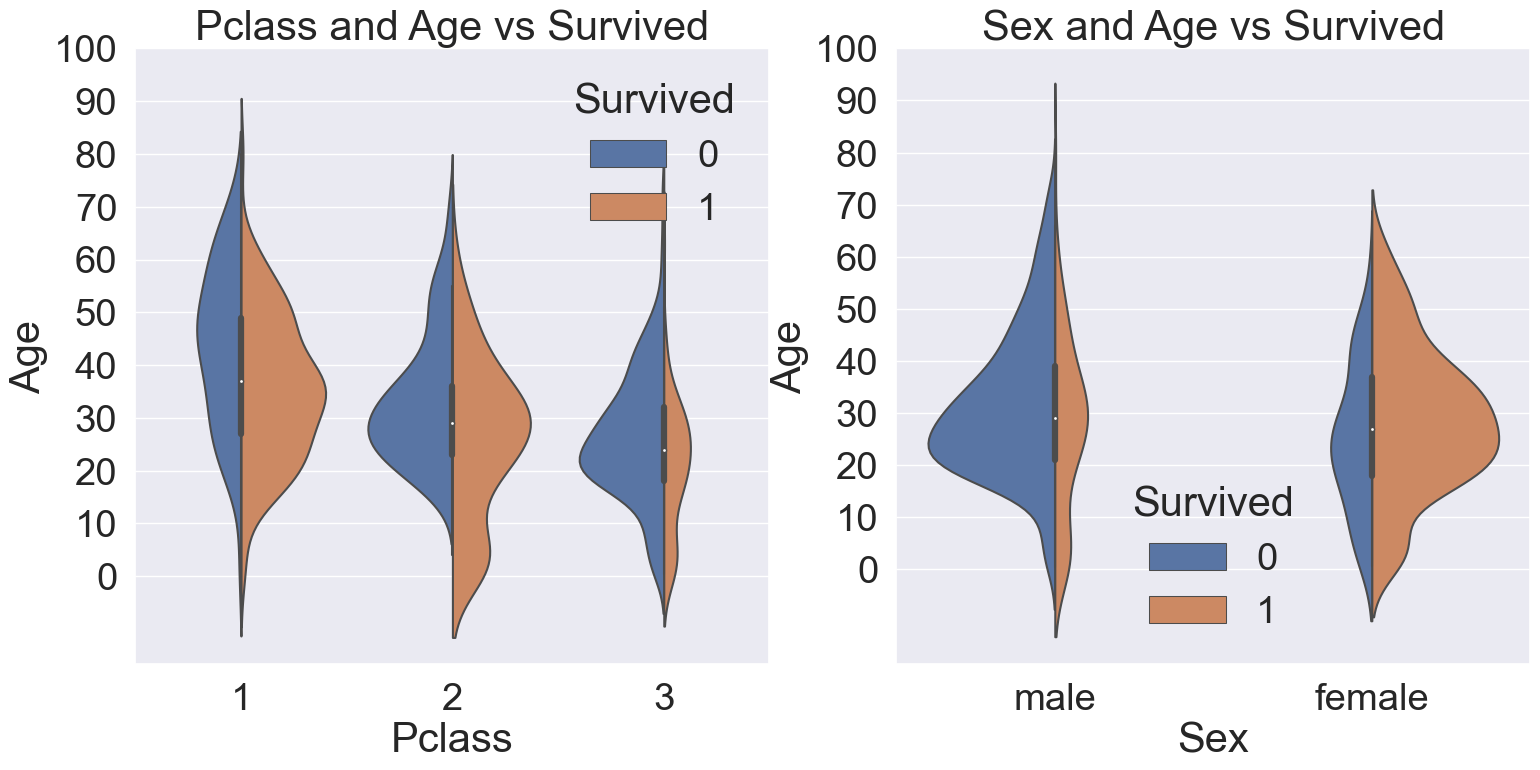

In [72]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x = 'Sex', y = 'Age', hue = 'Survived', data = df_train, scale = 'count', split = True, ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

# scale = 'count' : violinplot의 너비를 데이터의 개수에 따라 조정
# split = True : 분할된 그래프를 그림

- 왼쪽 그림은 Pclass별로 Age의 distribution이 어떻게 다른지 거기에 생존여부에 따라 구분한 그래프입니다.
- 오른쪽 그림도 Sex, 생존에 따른 distribution이 어떻게 다른지 보여주는 그래프입니다.
- 생존만 봤을 떄, 모든 클래스에서 나이가 어릴 수록 생존을 많이 한 것을 볼 수 있습니다.
- 오른쪽 그림에서 여자가 생존을 많이 한 것을 볼 수 있습니다.
- 여성과 아이들을 먼저 챙겨 생존하게 한 것으로 볼 수 있습니다.

# 2.6 Embarked
- Embarked는 탑승한 항구를 나타냅니다.
- 위에서 해왔던 것과 비슷하게 탑승한 곳에 따른 생존률을 보도록 하겠습니다.

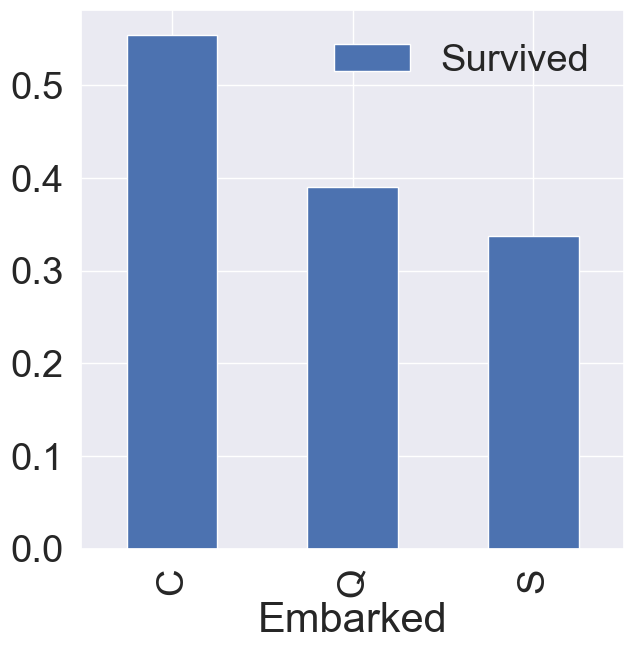

In [75]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax)
plt.show()

- 조금의 차이는 있지만 생존률은 좀 비슷한 것 같습니다. 그래도 C가 제일 높습니다.
- 모델에 얼마나 큰 영향을 미칠지는 모르겠지만 그래도 사용하겠습니다.
- 사실 모델을 만들고 나면 우리가 사용한 feature들이 얼마나 중요한 역할을 했는지 확인해볼 수 있습니다.
- 다른 feature로 split하여 살펴보도록 하겠습니다.

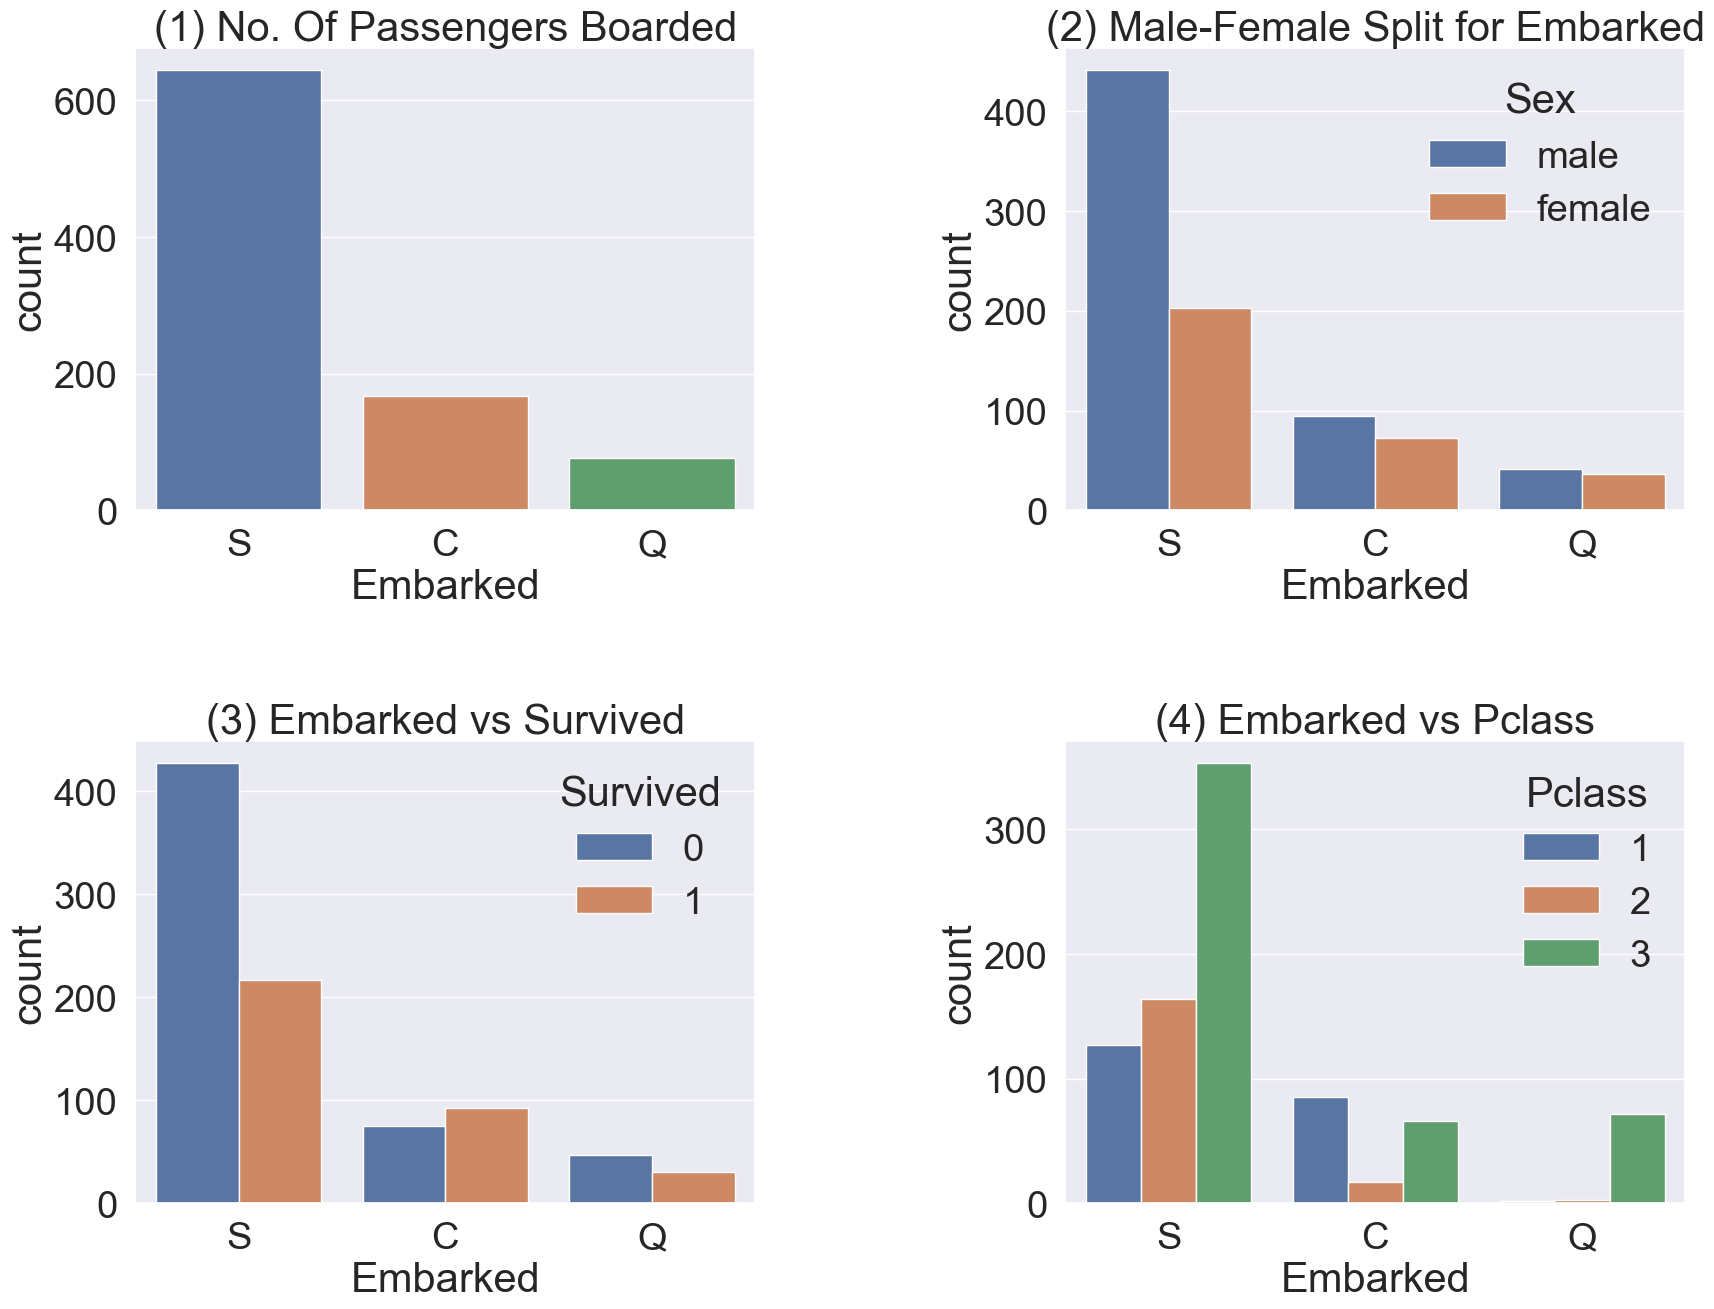

In [80]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x = 'Embarked', data = df_train, ax = ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x = 'Embarked', hue = 'Sex', data = df_train, ax = ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x = 'Embarked', hue = 'Survived', data = df_train, ax = ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x = 'Embarked', hue = 'Pclass', data = df_train, ax = ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

- Figure(1) - 전체적으로 봤을 때 S에서 가장 많은 사람이 탑습했습니다.
- Figure(2) - C와 Q는 남녀의 비율이 비슷하고, S는 남자가 더 많습니다.
- Figure(3) - 생존확률이 S인 경우 많이 낮은 것을 볼 수 있습니다
- Figure(4) - Class로  split해서 보니 생존확률이 높은건 클래스가 높은 사람이 많이 타서 그렇습니다. S는 3rd class가 많아서 생존 확률이 낮게 나옵니다.

# 2.7 Family -SibAp(형제 자매) + Parch(부모, 자녀)
- SibSp와 Parch를 합하면 Family 가 될 것입니다. Family 로 합쳐서 분석해봅니다.

In [81]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1 # 자신을 포함해야하니 1을 더합니다

In [82]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


FamilySize 와 생존의 관계를 한번 살펴봅시다

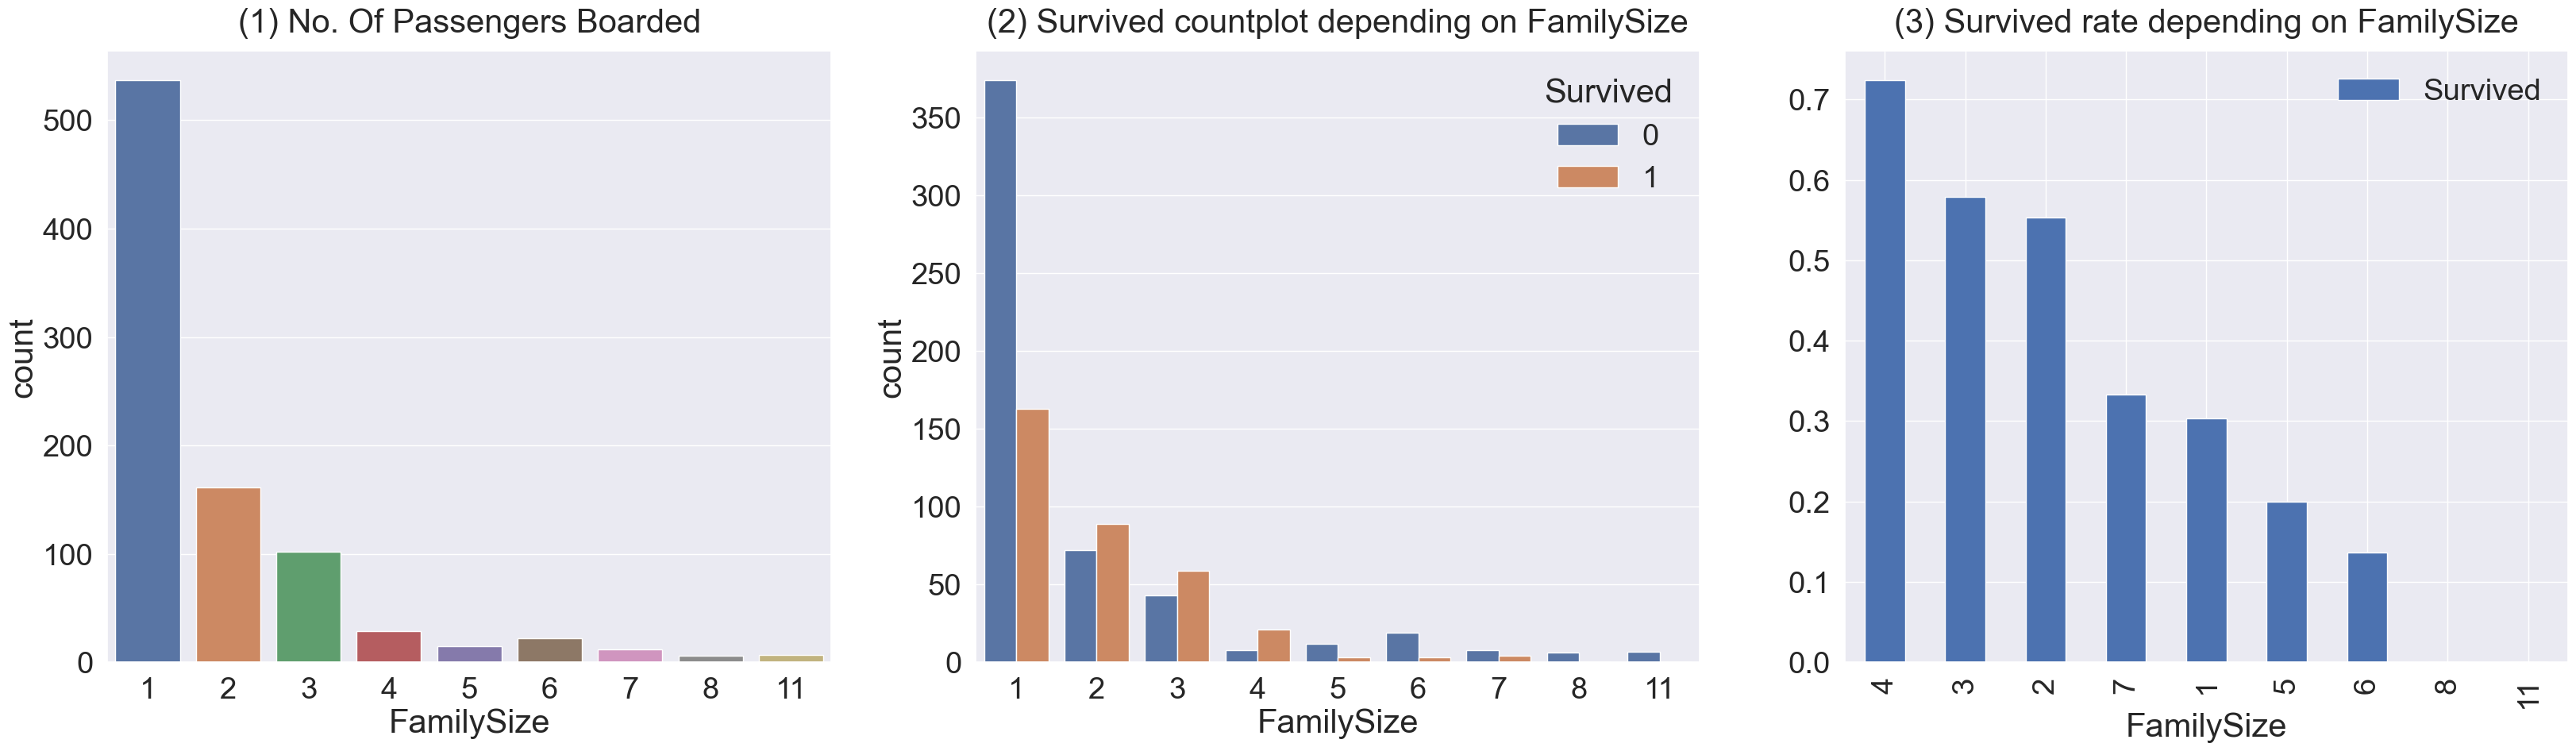

In [84]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x = 'FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- Figure (1) - 가족크기가 1~11까지 있음을 볼 수 있습니다. 대부분 1명이고 그 다음으로 2, 3, 4명입니다.
- Figure (2), (3) - 가족 크기에 따른 생존비교입니다. 가족이 4명인 경우가 가장 생존확률이 높습니다. 가족수가 많아질수록, (5, 6, 7, 8, 11) 생존확률이 낮아지네요. 가족수가 너무 작아도(1), 너무 커도(5, 6, 8, 11) 생존 확률이 작네요. 3~4명 선에서 생존확률이 높은 걸 확인할 수 있습니다.

# 2.8 Fare
Fare 는 탑승요금이며, contious feature 입니다. 한번 histogram 을 그려보겠습니다.

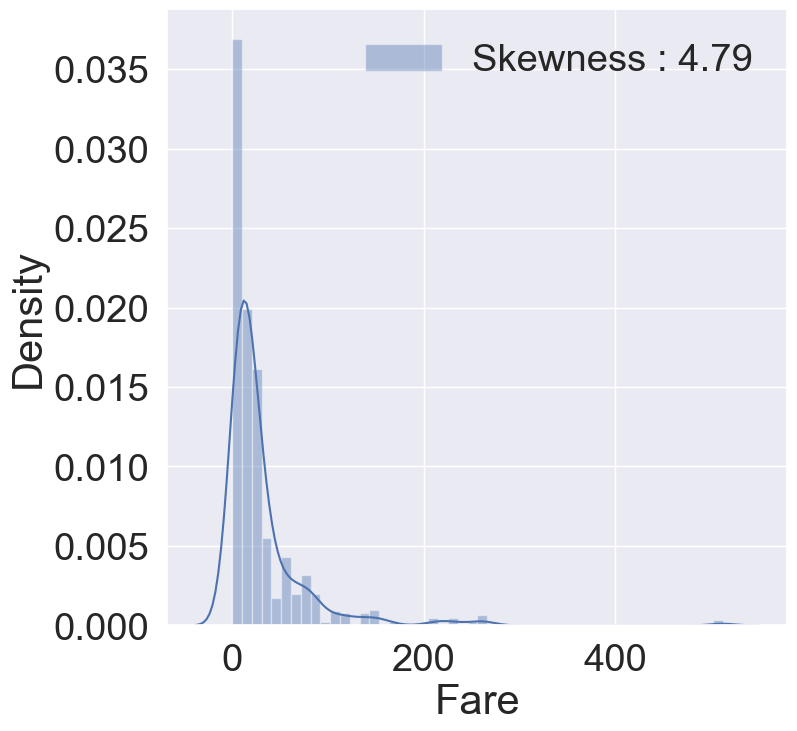

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- 위 그래프를 보면 distribution이 매우 비대칭인 것을 알 수 있습니다.(high skewness). 만약 이대로 모델에 넣어준다면 자칫 모델이 잘못 학습할 수도 있습니다. 몇 개 없는 outlier 에 대해서 너무 민감하게 반응한다면, 실제 예측 시에 좋지 못한 결과를 부를 수 있습니다.
- outlier의 영향을 줄이기 위해 Fare 에 log 를 취하겠습니다.
- 여기서 우리는 pandas 의 유용한 기능을 사용할 겁니다. dataFrame 의 특정 columns 에 공통된 작업(함수)를 적용하고 싶으면 아래의 map, 또는 apply 를 사용하면 매우 손쉽게 적용할 수 있습니다.
- 우리가 지금 원하는 것은 Fare columns 의 데이터 모두를 log 값 취하는 것인데, 파이썬의 간단한 lambda 함수를 이용해 간단한 로그를 적용하는 함수를 map 에 인수로 넣어주면, Fare columns 데이터에 그대로 적용이 됩니다.

In [86]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환합니다.

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

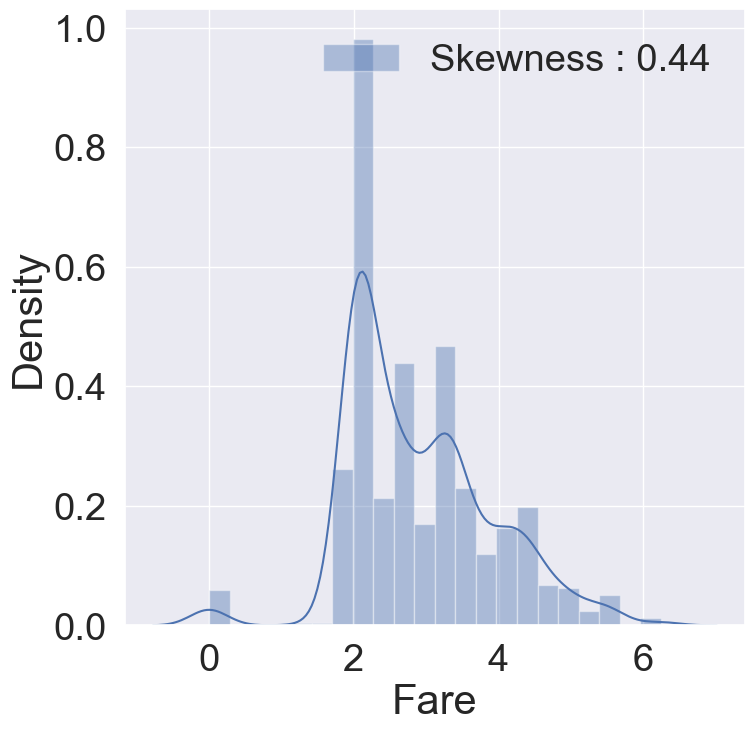

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

- log 를 취하니, 이제 비대칭성이 많이 사라진 것을 볼 수 있습니다.
- 우리는 이런 작업을 사용해 모델이 좀 더 좋은 성능을 내도록 할 수 있습니다.
- 사실 방금한 것은 feature engineering 에 들어가는 부분인데, 여기서 작업했습니다.
- 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 새로운 feature를 추가하는 것을 feature engineering 이라고 하는데, 우리는 이제 그것을 살펴볼 것입니다.

# 2.9 Cabin
- 이 feature 는 NaN 이 대략 80% 이므로, 생존에 영향을 미칠 중요한 정보를 얻어내기가 쉽지는 않습니다.
- 그러므로 우리가 세우려는 모델에 포함시키지 않도록 하겠습니다.

In [88]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


# 2.10 Ticket
- 이 feature 는 NaN 은 없습니다. 
- 일단 string data 이므로 우리가 어떤 작업들을 해주어야 실제 모델에 사용할 수 있는데, 이를 위해선 사실 아이디어가 필요합니다.

In [89]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

보시다시피, ticket number 는 매우 다양합니다.